In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

spectrum_train = pd.read_excel("spectrum_train.xlsx")
spectrum_test = pd.read_excel("spectrum_valid.xlsx")
temp_train = pd.read_excel("temp_train.xlsx")
temp_test = pd.read_excel("temp_valid.xlsx")

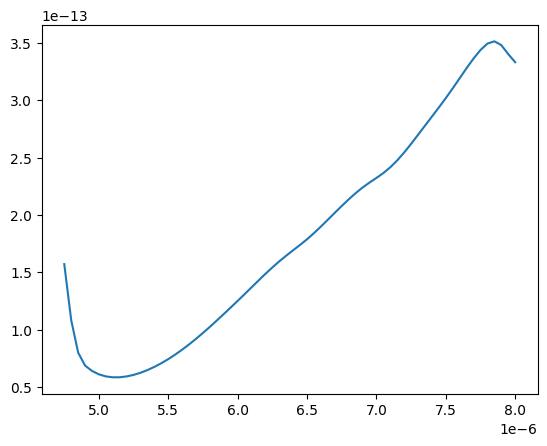

In [5]:
plt.plot(spectrum_train.iloc[30])

In [7]:
spectrum_train.describe()

,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
count,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,...,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03,1.296000e+03
mean,5.089426e-12,5.433904e-12,5.674894e-12,5.903974e-12,6.098247e-12,6.303267e-12,6.501709e-12,6.696860e-12,6.888986e-12,7.080492e-12,...,1.401656e-11,1.407146e-11,1.410430e-11,1.410111e-11,1.405364e-11,1.392937e-11,1.366838e-11,1.321456e-11,1.261343e-11,1.206134e-11
std,4.837723e-12,5.346829e-12,5.691439e-12,5.955409e-12,6.150115e-12,6.346781e-12,6.528982e-12,6.700994e-12,6.863908e-12,7.020814e-12,...,1.092560e-11,1.091860e-11,1.089346e-11,1.084028e-11,1.075363e-11,1.060940e-11,1.036300e-11,9.973466e-12,9.476917e-12,9.021635e-12
min,9.125460e-14,6.102200e-14,4.425636e-14,3.645667e-14,3.305946e-14,3.081798e-14,2.939875e-14,2.863974e-14,2.841663e-14,2.863840e-14,...,1.463418e-13,1.510439e-13,1.559027e-13,1.606176e-13,1.649501e-13,1.684098e-13,1.701570e-13,1.693208e-13,1.662824e-13,1.635301e-13
25%,1.553204e-12,1.482577e-12,1.463356e-12,1.504359e-12,1.563340e-12,1.630620e-12,1.701643e-12,1.774279e-12,1.852020e-12,1.925730e-12,...,5.984318e-12,6.047798e-12,6.103360e-12,6.143969e-12,6.165075e-12,6.151651e-12,6.076332e-12,5.912847e-12,5.680051e-12,5.465706e-12
50%,3.159627e-12,3.239412e-12,3.368942e-12,3.559924e-12,3.723912e-12,3.907885e-12,4.087536e-12,4.264512e-12,4.418275e-12,4.563520e-12,...,1.095007e-11,1.102330e-11,1.108251e-11,1.111492e-11,1.111245e-11,1.104841e-11,1.087445e-11,1.054486e-11,1.009475e-11,9.680737e-12
75%,7.847071e-12,8.315269e-12,8.645588e-12,8.966900e-12,9.207320e-12,9.478005e-12,9.777955e-12,1.009761e-11,1.039943e-11,1.068593e-11,...,2.126098e-11,2.132935e-11,2.136380e-11,2.134340e-11,2.125588e-11,2.105229e-11,2.064239e-11,1.994205e-11,1.902052e-11,1.817421e-11
max,2.183023e-11,2.401439e-11,2.532120e-11,2.629408e-11,2.708649e-11,2.789618e-11,2.863611e-11,2.932745e-11,2.997661e-11,3.059829e-11,...,4.500347e-11,4.495561e-11,4.483689e-11,4.460532e-11,4.423751e-11,4.363399e-11,4.261132e-11,4.100140e-11,3.895290e-11,3.707533e-11


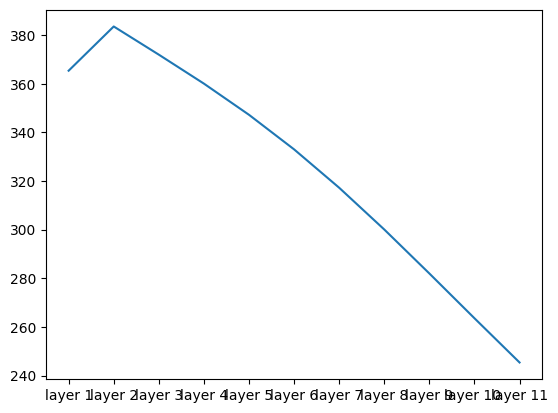

In [14]:
plt.plot(temp_train.iloc[60])

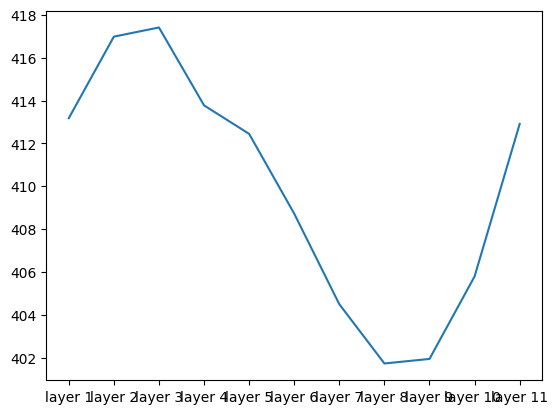

In [12]:
plt.plot(temp_test.iloc[15])